<a href="https://colab.research.google.com/github/Julien-pour/ensea/blob/main/mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
from scipy.integrate import odeint
α = 6.27; γ = 0.07; q = 0.68; η = 6.27

In [ ]:
def F(X,t):
    x,y,z = X[0],X[1],X[2] # ou bien x,y = X
    return α*y, -γ*(x+z)-q*y, η*(y+1-np.exp(-x))

temps = np.linspace(0,1000, 100000)
sol = odeint(F,[0.6,0.45,-0.35], temps)


In [ ]:
X1=sol[:,0]
X2=sol[:,1]
X3=sol[:,2]
t=temps

<IPython.core.display.Javascript object>


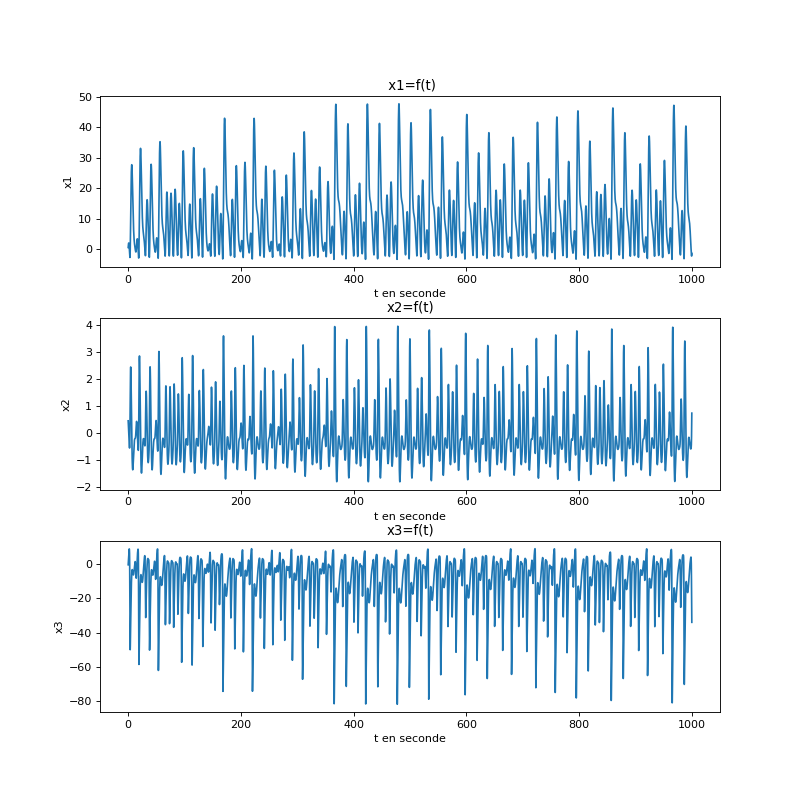

In [ ]:
plt.subplots(figsize=(10,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.subplot(3, 1, 1) # (rows, columns, panel number)
plt.title(" x1=f(t)")
plt.ylabel("x1")
plt.xlabel("t en seconde")
plt.plot(t,X1)
plt.subplot(3, 1, 2) 
plt.title("x2=f(t)")
plt.ylabel("x2")
plt.xlabel("t en seconde")
plt.plot(t,X2)
plt.subplot(3, 1, 3) 
plt.title("x3=f(t)")
plt.ylabel("x3")
plt.xlabel("t en seconde")
plt.plot(t,X3)


In [ ]:
?plt.plot

<IPython.core.display.Javascript object>


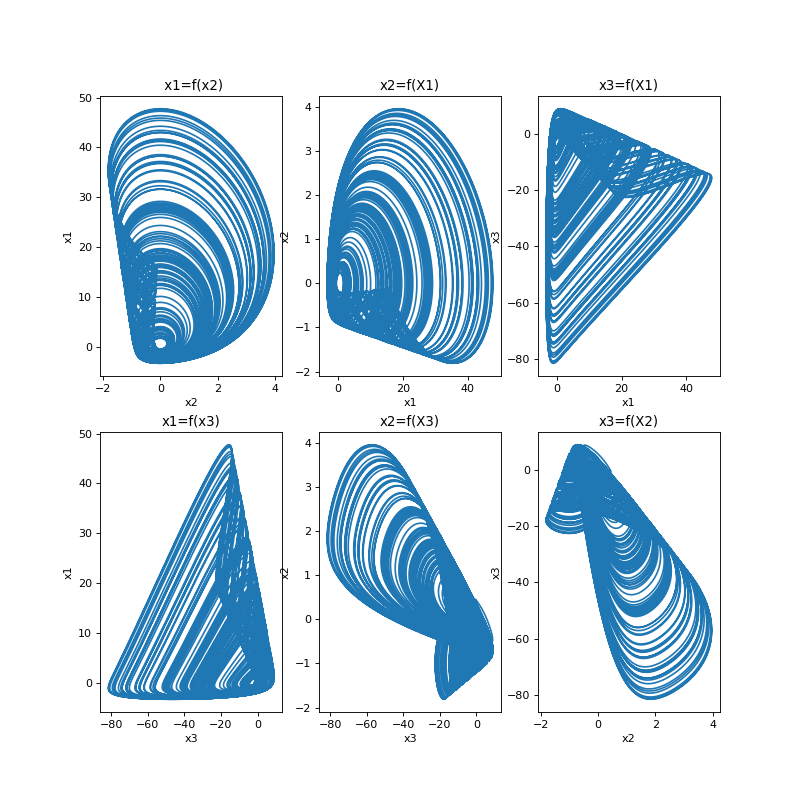

In [ ]:
plt.subplots(figsize=(10,10))
plt.subplot(2, 3, 1) # (rows, columns, panel number)
plt.title(" x1=f(x2)")
plt.ylabel("x1")
plt.xlabel("x2")
plt.plot(X2,X1)
plt.subplot(2, 3, 4) 
plt.title("x1=f(x3)")
plt.ylabel("x1")
plt.xlabel("x3")
plt.plot(X3,X1)
plt.subplot(2, 3, 2) 
plt.title("x2=f(X1)")
plt.ylabel("x2")
plt.xlabel("x1")
plt.plot(X1,X2,)
plt.subplot(2, 3, 5) 
plt.title("x2=f(X3)")
plt.ylabel("x2")
plt.xlabel("x3")
plt.plot(X3,X2)
plt.subplot(2, 3, 3) 
plt.title("x3=f(X1)")
plt.ylabel("x3")
plt.xlabel("x1")
plt.plot(X1,X3)
plt.subplot(2, 3, 6) 
plt.title("x3=f(X2)")
plt.ylabel("x3")
plt.xlabel("x2")
plt.plot(X2,X3)


<IPython.core.display.Javascript object>


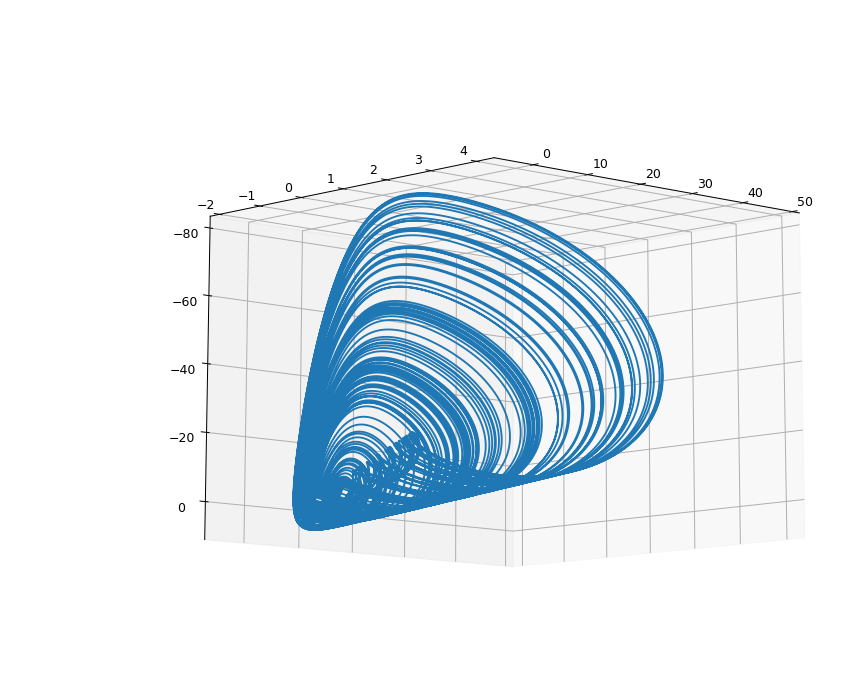

In [ ]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(xs=X1, ys=X2, zs=X3,zdir='z')
plt.show()